In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/office/interview/groundup_ai

/content/gdrive/MyDrive/office/interview/groundup_ai


In [3]:
!pwd

/content/gdrive/MyDrive/office/interview/groundup_ai


In [4]:
!pip3 install librosa

In [5]:
AUDIO_PATH = "data/ESC-50-master/audio"
LABEL_PATH_FILE = "data/ESC-50-master/meta/esc50.csv"

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import pandas as pd

def filter_animal_rows(df, animal_labels=None):
    """
    Filter DataFrame rows to include only those with categories in the animal labels list.

    Parameters:
    df (pd.DataFrame): Input DataFrame with 'category' column
    animal_labels (list): List of animal category names to filter by

    Returns:
    pd.DataFrame: Filtered DataFrame containing only animal categories
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Roster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    # Convert to lowercase for case-insensitive matching
    animal_labels_lower = [label.lower() for label in animal_labels]

    # Filter rows where category is in the animal labels list
    animal_df = df[df['category'].str.lower().isin(animal_labels_lower)].copy()

    return animal_df

def get_label_fold_statistics(df, animal_labels=None):
    """
    Get statistics showing the distribution of each animal label across folds.

    Parameters:
    df (pd.DataFrame): Input DataFrame with 'category' and 'fold' columns
    animal_labels (list): List of animal category names to analyze

    Returns:
    dict: Dictionary containing statistics with the following structure:
        - 'summary_table': DataFrame with labels as rows and folds as columns
        - 'total_per_label': Series with total count per label
        - 'total_per_fold': Series with total count per fold
        - 'overall_total': Total number of animal samples
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Roster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    # First filter to get only animal rows
    animal_df = filter_animal_rows(df, animal_labels)

    if animal_df.empty:
        print("No animal labels found in the dataset")
        return None

    # Create cross-tabulation of category vs fold
    cross_tab = pd.crosstab(animal_df['category'], animal_df['fold'], margins=True)

    # Calculate statistics
    total_per_label = cross_tab.iloc[:-1, -1]  # Exclude 'All' row and column
    total_per_fold = cross_tab.iloc[-1, :-1]   # Exclude 'All' row and column
    overall_total = cross_tab.iloc[-1, -1]     # The 'All'/'All' cell

    # Create clean summary table without margins
    summary_table = cross_tab.iloc[:-1, :-1]

    # Print formatted statistics
    print("=== Animal Label Distribution Across Folds ===\n")
    print("Summary Table:")
    print(summary_table)
    print(f"\nTotal samples per label:")
    for label, count in total_per_label.items():
        print(f"  {label}: {count}")

    print(f"\nTotal samples per fold:")
    for fold, count in total_per_fold.items():
        print(f"  Fold {fold}: {count}")

    print(f"\nOverall total animal samples: {overall_total}")

    # Calculate percentages
    print(f"\nLabel distribution (%):")
    for label, count in total_per_label.items():
        percentage = (count / overall_total) * 100
        print(f"  {label}: {percentage:.1f}%")

    return {
        'summary_table': summary_table,
        'total_per_label': total_per_label,
        'total_per_fold': total_per_fold,
        'overall_total': overall_total,
        'animal_df': animal_df
    }


import pandas as pd

def filter_animal_rows(df, animal_labels=None):
    """
    Filter DataFrame rows to include only those with categories in the animal labels list.

    Parameters:
    df (pd.DataFrame): Input DataFrame with 'category' column
    animal_labels (list): List of animal category names to filter by

    Returns:
    pd.DataFrame: Filtered DataFrame containing only animal categories
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Roster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    # Convert to lowercase for case-insensitive matching
    animal_labels_lower = [label.lower() for label in animal_labels]

    # Filter rows where category is in the animal labels list
    animal_df = df[df['category'].str.lower().isin(animal_labels_lower)].copy()

    return animal_df

def get_label_fold_statistics(df, animal_labels=None):
    """
    Get statistics showing the distribution of each animal label across folds.

    Parameters:
    df (pd.DataFrame): Input DataFrame with 'category' and 'fold' columns
    animal_labels (list): List of animal category names to analyze

    Returns:
    dict: Dictionary containing statistics with the following structure:
        - 'summary_table': DataFrame with labels as rows and folds as columns
        - 'total_per_label': Series with total count per label
        - 'total_per_fold': Series with total count per fold
        - 'overall_total': Total number of animal samples
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Roster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    # First filter to get only animal rows
    animal_df = filter_animal_rows(df, animal_labels)

    if animal_df.empty:
        print("No animal labels found in the dataset")
        return None

    # Create cross-tabulation of category vs fold
    cross_tab = pd.crosstab(animal_df['category'], animal_df['fold'], margins=True)

    # Calculate statistics
    total_per_label = cross_tab.iloc[:-1, -1]  # Exclude 'All' row and column
    total_per_fold = cross_tab.iloc[-1, :-1]   # Exclude 'All' row and column
    overall_total = cross_tab.iloc[-1, -1]     # The 'All'/'All' cell

    # Create clean summary table without margins
    summary_table = cross_tab.iloc[:-1, :-1]

    # Print formatted statistics
    print("=== Animal Label Distribution Across Folds ===\n")
    print("Summary Table:")
    print(summary_table)
    print(f"\nTotal samples per label:")
    for label, count in total_per_label.items():
        print(f"  {label}: {count}")

    print(f"\nTotal samples per fold:")
    for fold, count in total_per_fold.items():
        print(f"  Fold {fold}: {count}")

    print(f"\nOverall total animal samples: {overall_total}")

    # Calculate percentages
    print(f"\nLabel distribution (%):")
    for label, count in total_per_label.items():
        percentage = (count / overall_total) * 100
        print(f"  {label}: {percentage:.1f}%")

    return {
        'summary_table': summary_table,
        'total_per_label': total_per_label,
        'total_per_fold': total_per_fold,
        'overall_total': overall_total,
        'animal_df': animal_df
    }


def split_train_val_test(df, animal_labels=None, random_state=42):
    """
    Split filtered animal data into training, validation, and testing sets.

    Split strategy:
    - Training: Fold 1, 2, 3 + 50% of Fold 4
    - Validation: Fold 5
    - Testing: Remaining 50% of Fold 4

    Parameters:
    df (pd.DataFrame): Input DataFrame with 'category' and 'fold' columns
    animal_labels (list): List of animal category names to filter by
    random_state (int): Random seed for reproducible splits of fold 4

    Returns:
    dict: Dictionary containing:
        - 'train': Training DataFrame
        - 'val': Validation DataFrame
        - 'test': Testing DataFrame
        - 'split_info': Dictionary with split statistics
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Roster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    # First filter to get only animal rows
    animal_df = filter_animal_rows(df, animal_labels)

    if animal_df.empty:
        print("No animal labels found in the dataset")
        return None

    # Split data based on folds
    train_base = animal_df[animal_df['fold'].isin([1, 2, 3])].copy()
    fold_4 = animal_df[animal_df['fold'] == 4].copy()
    validation = animal_df[animal_df['fold'] == 5].copy()

    # Split fold 4 into two equal parts (50% each)
    # Group by category to ensure balanced split across all animal types
    fold_4_train_list = []
    fold_4_test_list = []

    for category in fold_4['category'].unique():
        category_data = fold_4[fold_4['category'] == category].copy()

        # Shuffle the data for this category
        category_data = category_data.sample(frac=1, random_state=random_state).reset_index(drop=True)

        # Split 50-50
        mid_point = len(category_data) // 2
        fold_4_train_list.append(category_data.iloc[:mid_point])
        fold_4_test_list.append(category_data.iloc[mid_point:])

    # Combine the splits
    fold_4_train = pd.concat(fold_4_train_list, ignore_index=True)
    fold_4_test = pd.concat(fold_4_test_list, ignore_index=True)

    # Create final splits
    train = pd.concat([train_base, fold_4_train], ignore_index=True)
    val = validation.copy()
    test = fold_4_test.copy()

    # Calculate split statistics
    split_info = {
        'train_size': len(train),
        'val_size': len(val),
        'test_size': len(test),
        'total_size': len(animal_df),
        'train_percentage': (len(train) / len(animal_df)) * 100,
        'val_percentage': (len(val) / len(animal_df)) * 100,
        'test_percentage': (len(test) / len(animal_df)) * 100
    }

    # Print split information
    print("=== Train/Validation/Test Split ===\n")
    print(f"Training set:   {split_info['train_size']:3d} samples ({split_info['train_percentage']:.1f}%)")
    print(f"Validation set: {split_info['val_size']:3d} samples ({split_info['val_percentage']:.1f}%)")
    print(f"Testing set:    {split_info['test_size']:3d} samples ({split_info['test_percentage']:.1f}%)")
    print(f"Total:          {split_info['total_size']:3d} samples (100.0%)")

    # Show distribution by category for each split
    print(f"\nDistribution by category:")
    print(f"{'Category':<10} {'Train':<6} {'Val':<6} {'Test':<6} {'Total':<6}")
    print("-" * 40)

    for category in sorted(animal_df['category'].unique()):
        train_count = len(train[train['category'] == category])
        val_count = len(val[val['category'] == category])
        test_count = len(test[test['category'] == category])
        total_count = train_count + val_count + test_count

        print(f"{category:<10} {train_count:<6} {val_count:<6} {test_count:<6} {total_count:<6}")

    return {
        'train': train,
        'val': val,
        'test': test,
        'split_info': split_info
    }


def draw_fold_pie_charts(stats, figsize=(12, 9)):
    """
    Draw pie charts for each fold showing the distribution of animal categories.

    Parameters:
    stats (dict): Statistics dictionary returned by get_label_fold_statistics()
    figsize (tuple): Figure size (width, height) for the plot

    Returns:
    matplotlib.figure.Figure: The figure object containing all pie charts
    """
    if stats is None or 'summary_table' not in stats:
        print("Invalid stats input. Please run get_label_fold_statistics() first.")
        return None

    summary_table = stats['summary_table']

    # Create subplots - 2 rows, 3 columns (with one empty subplot)
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle('Animal Category Distribution Across Folds', fontsize=16, fontfamily='serif')

    # Flatten axes for easier indexing
    axes = axes.flatten()

    # Define colors for consistent coloring across all pie charts
    colors = plt.cm.Set3(range(len(summary_table.index)))

    # Create pie chart for each fold
    for fold_idx, fold in enumerate(summary_table.columns):
        ax = axes[fold_idx]

        # Get data for this fold
        fold_data = summary_table[fold]

        # Create pie chart
        wedges, texts, autotexts = ax.pie(
            fold_data.values,
            labels=fold_data.index,
            autopct='%1.0f',  # Show count instead of percentage since all are equal
            colors=colors,
            textprops={'fontfamily': 'serif', 'fontsize': 10}
        )

        # Set title with specified font
        ax.set_title(f'Fold {fold}', fontsize=12, fontfamily='serif')

        # Make sure the pie chart is circular
        ax.axis('equal')

    # Hide the empty subplot (6th position)
    axes[5].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Add a legend outside the plots
    fig.legend(wedges, summary_table.index,
              title="Animal Categories",
              loc='center',
              bbox_to_anchor=(0.83, 0.25),
              fontsize=10,
              title_fontsize=12,
              prop={'family': 'serif'})

    return fig

def draw_overall_distribution_pie(stats, figsize=(6, 6)):
    """
    Draw a single pie chart showing the overall distribution of all animal categories.

    Parameters:
    stats (dict): Statistics dictionary returned by get_label_fold_statistics()
    figsize (tuple): Figure size (width, height) for the plot

    Returns:
    matplotlib.figure.Figure: The figure object containing the pie chart
    """
    if stats is None or 'total_per_label' not in stats:
        print("Invalid stats input. Please run get_label_fold_statistics() first.")
        return None

    total_per_label = stats['total_per_label']

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Define colors
    colors = plt.cm.Set3(range(len(total_per_label)))

    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        total_per_label.values,
        labels=total_per_label.index,
        autopct='%1.1f%%',
        colors=colors,
        textprops={'fontfamily': 'serif', 'fontsize': 10}
    )

    # Set title
    ax.set_title('Overall Animal Category Distribution\n(All Folds Combined)',
                fontsize=12, fontfamily='serif')

    # Make sure the pie chart is circular
    ax.axis('equal')

    # Adjust layout
    plt.tight_layout()

    return fig

## Read animal labels

In [8]:
ANIMAL_LABELS = ["Dog", "Rooster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

In [9]:
label = pd.read_csv(LABEL_PATH_FILE)
label.head(10)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [10]:
animal_data = filter_animal_rows(label, ANIMAL_LABELS)
print(f"Found {len(animal_data)} animal samples out of {len(label)} total samples")

Found 400 animal samples out of 2000 total samples


In [11]:
animal_data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
29,1-121951-A-8.wav,1,8,sheep,False,121951,A
45,1-15689-A-4.wav,1,4,frog,False,15689,A


## Inspect class distribution across folds

=== Animal Label Distribution Across Folds ===

Summary Table:
fold      1  2  3  4  5
category               
cat       8  8  8  8  8
cow       8  8  8  8  8
crow      8  8  8  8  8
dog       8  8  8  8  8
frog      8  8  8  8  8
hen       8  8  8  8  8
insects   8  8  8  8  8
pig       8  8  8  8  8
rooster   8  8  8  8  8
sheep     8  8  8  8  8

Total samples per label:
  cat: 40
  cow: 40
  crow: 40
  dog: 40
  frog: 40
  hen: 40
  insects: 40
  pig: 40
  rooster: 40
  sheep: 40

Total samples per fold:
  Fold 1: 80
  Fold 2: 80
  Fold 3: 80
  Fold 4: 80
  Fold 5: 80

Overall total animal samples: 400

Label distribution (%):
  cat: 10.0%
  cow: 10.0%
  crow: 10.0%
  dog: 10.0%
  frog: 10.0%
  hen: 10.0%
  insects: 10.0%
  pig: 10.0%
  rooster: 10.0%
  sheep: 10.0%

Summary table shape: (10, 5)
Labels found: ['cat', 'cow', 'crow', 'dog', 'frog', 'hen', 'insects', 'pig', 'rooster', 'sheep']


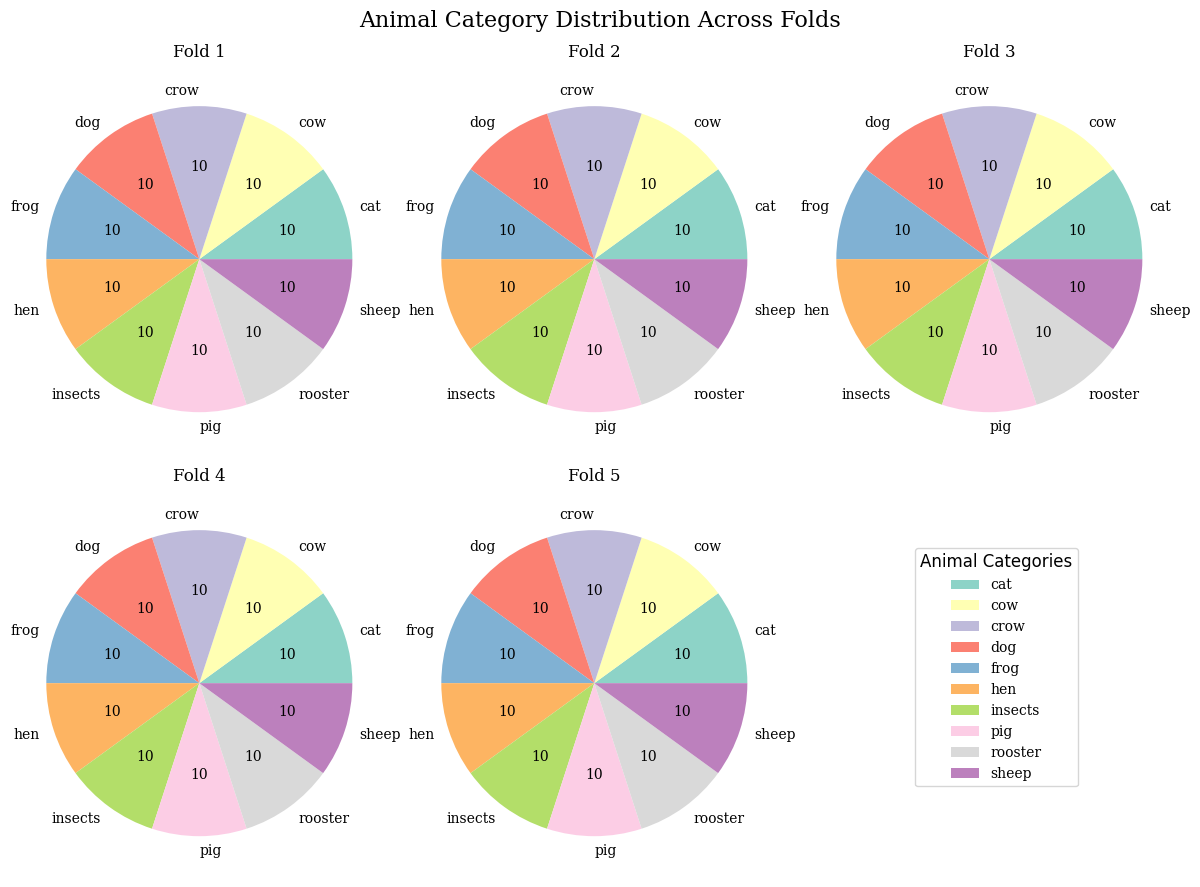

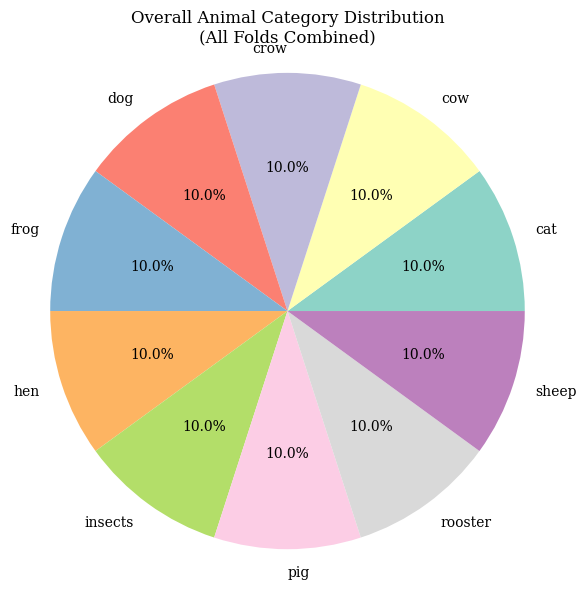

In [12]:
# Get statistics
stats = get_label_fold_statistics(label, ANIMAL_LABELS)

# Access specific statistics
if stats:
    print("\nSummary table shape:", stats['summary_table'].shape)
    print("Labels found:", list(stats['total_per_label'].index))

if stats:
    fold_charts = draw_fold_pie_charts(stats)
    plt.show()

    # Draw overall distribution pie chart
    overall_chart = draw_overall_distribution_pie(stats)
    plt.show()

**Conclusion:** <br>
our dataset class are balanced across folds, <br>
**No need** oversampling method required

## Split Datatset
1. train dataset (70%)
2. validation dataset (20%)
3. test dataset (10%)

In [13]:
train_df = None
val_df = None
test_df = None

# Split into train/val/test
splits = split_train_val_test(label, ANIMAL_LABELS)
if splits:
    train_df = splits['train']
    val_df = splits['val']
    test_df = splits['test']

    print(f"\nTraining samples: {len(train_df)}")
    print(f"Validation samples: {len(val_df)}")
    print(f"Testing samples: {len(test_df)}")

=== Train/Validation/Test Split ===

Training set:   280 samples (70.0%)
Validation set:  80 samples (20.0%)
Testing set:     40 samples (10.0%)
Total:          400 samples (100.0%)

Distribution by category:
Category   Train  Val    Test   Total 
----------------------------------------
cat        28     8      4      40    
cow        28     8      4      40    
crow       28     8      4      40    
dog        28     8      4      40    
frog       28     8      4      40    
hen        28     8      4      40    
insects    28     8      4      40    
pig        28     8      4      40    
rooster    28     8      4      40    
sheep      28     8      4      40    

Training samples: 280
Validation samples: 80
Testing samples: 40


## Load Audio Data -> to pandas datafram

In [19]:
def load_audio_features(df, audio_path, sr=22050, animal_labels=None):
    """
    Load all audio files from a given dataframe and create a feature dataframe.

    Parameters:
    df (pd.DataFrame): DataFrame containing audio file information (train_df, val_df, or test_df)
    audio_path (str): Path to the directory containing audio files
    sr (int): Sample rate for loading audio files (default: 22050)
    animal_labels (list): List of animal category names for target encoding

    Returns:
    pd.DataFrame: Feature dataframe with columns based on audio data length:
        - Multiple columns named 'f1', 'f2', ..., 'fn' (where n is max audio length)
        - 'category': Animal category label
        - 'target': Numeric target (index of category in animal_labels list)
        - 'file_path': Full path to the audio file
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Rooster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    # Convert animal_labels to lowercase for matching
    animal_labels_lower = [label.lower() for label in animal_labels]

    if df.empty:
        print("Input dataframe is empty")
        return pd.DataFrame()

    feature_list = []
    total_files = len(df)
    max_length = 0

    print(f"Loading {total_files} audio files...")

    # First pass: determine the maximum audio length
    temp_audio_data = []
    for idx, row in df.iterrows():
        try:
            # Construct full file path
            file_path = f"{audio_path}/{row['filename']}"

            # Load audio file
            audio, sample_rate = librosa.load(file_path, sr=sr)

            # Get category and create target
            category = row['category'].lower()

            # Find target index
            try:
                target = animal_labels_lower.index(category)
            except ValueError:
                print(f"Warning: Category '{category}' not found in animal_labels. Skipping file {row['filename']}")
                continue

            temp_audio_data.append({
                'audio': audio,
                'category': category,
                'target': target,
                'path_file': file_path
            })

            max_length = max(max_length, len(audio))

            # Progress indicator
            if (idx + 1) % 50 == 0 or (idx + 1) == total_files:
                print(f"Processed {idx + 1}/{total_files} files ({((idx + 1)/total_files)*100:.1f}%)")

        except Exception as e:
            print(f"Error loading {row['filename']}: {str(e)}")
            continue

    print(f"Maximum audio length found: {max_length} samples")

    # Second pass: create the feature dataframe with padded audio data
    for data in temp_audio_data:
        audio = data['audio']

        # Pad audio to max_length with zeros
        padded_audio = np.pad(audio, (0, max_length - len(audio)), mode='constant', constant_values=0)

        # Create feature dictionary with audio series columns
        feature_dict = {}

        # Add audio data as separate columns
        for i, sample in enumerate(padded_audio):
            feature_dict[f'f{i+1}'] = sample

        # Add category, target, and file_path
        feature_dict['category'] = data['category']
        feature_dict['target'] = data['target']
        feature_dict['path_file'] = data['path_file']

        feature_list.append(feature_dict)

    # Create DataFrame from feature list
    feature_df = pd.DataFrame(feature_list)

    if not feature_df.empty:
        print(f"\nSuccessfully loaded {len(feature_df)} audio files")
        print(f"Feature dataframe shape: {feature_df.shape}")
        print(f"Audio columns: {max_length} (f1 to f{max_length})")
        print(f"Additional columns: category, target, path_file")
        print(f"Categories: {sorted(feature_df['category'].unique())}")

        # Show category distribution with targets
        print(f"\nCategory distribution with targets:")
        category_counts = feature_df[['category', 'target']].drop_duplicates().sort_values('target')
        for _, row in category_counts.iterrows():
            count = len(feature_df[feature_df['category'] == row['category']])
            print(f"  {row['category']} (target={row['target']}): {count} files")

        # Show target distribution
        print(f"\nTarget distribution:")
        target_counts = feature_df['target'].value_counts().sort_index()
        for target, count in target_counts.items():
            category = feature_df[feature_df['target'] == target]['category'].iloc[0]
            print(f"  Target {target} ({category}): {count} files")
    else:
        print("No audio files were successfully loaded")

    return feature_df

def load_all_splits_features(splits, audio_path, sr=22050):
    """
    Load audio features for all splits (train, validation, test) and return them separately.

    Parameters:
    splits (dict): Dictionary containing 'train', 'val', 'test' DataFrames
    audio_path (str): Path to the directory containing audio files
    sr (int): Sample rate for loading audio files (default: 22050)

    Returns:
    dict: Dictionary containing:
        - 'train_features': Feature DataFrame for training data
        - 'val_features': Feature DataFrame for validation data
        - 'test_features': Feature DataFrame for test data
        - 'summary': Summary statistics
    """
    if splits is None:
        print("Invalid splits input. Please run split_train_val_test() first.")
        return None

    print("=== Loading Audio Features for All Splits ===\n")

    # Load features for each split
    print("Loading TRAINING data:")
    train_features = load_audio_features(splits['train'], audio_path, sr)

    print("\nLoading VALIDATION data:")
    val_features = load_audio_features(splits['val'], audio_path, sr)

    print("\nLoading TEST data:")
    test_features = load_audio_features(splits['test'], audio_path, sr)

    # Create summary
    summary = {
        'train_count': len(train_features),
        'val_count': len(val_features),
        'test_count': len(test_features),
        'total_count': len(train_features) + len(val_features) + len(test_features),
        'sample_rate': sr
    }

    print(f"\n=== Loading Summary ===")
    print(f"Training features:   {summary['train_count']} files")
    print(f"Validation features: {summary['val_count']} files")
    print(f"Test features:       {summary['test_count']} files")
    print(f"Total features:      {summary['total_count']} files")

    return {
        'train_features': train_features,
        'val_features': val_features,
        'test_features': test_features,
        'summary': summary
    }

In [20]:
def plot_audio_waveform(feature_df, row_index, figsize=(12, 4)):
    """
    Plot the feature values of an audio file from the feature dataframe.

    Parameters:
    feature_df (pd.DataFrame): Feature dataframe containing audio data in f1, f2, ..., fn columns
    row_index (int): Index of the row to plot
    figsize (tuple): Figure size (width, height) for the plot

    Returns:
    matplotlib.figure.Figure: The figure object containing the feature plot
    """
    if feature_df.empty:
        print("Feature dataframe is empty")
        return None

    if row_index >= len(feature_df) or row_index < 0:
        print(f"Row index {row_index} is out of range. DataFrame has {len(feature_df)} rows (0 to {len(feature_df)-1})")
        return None

    # Get the row data
    row_data = feature_df.iloc[row_index]

    # Extract audio features (all columns starting with 'f')
    audio_columns = [col for col in feature_df.columns if col.startswith('f') and col[1:].isdigit()]
    audio_columns.sort(key=lambda x: int(x[1:]))  # Sort by numeric value (f1, f2, f3, ...)

    if not audio_columns:
        print("No audio feature columns found (columns starting with 'f')")
        return None

    # Extract feature values and labels
    feature_values = row_data[audio_columns].values
    feature_labels = audio_columns

    # Get metadata
    category = row_data.get('category', 'Unknown')
    file_path = row_data.get('file_path', 'Unknown')
    filename = file_path.split('/')[-1] if '/' in str(file_path) else str(file_path)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot feature values
    x_positions = range(len(feature_values))
    ax.plot(x_positions, feature_values, color='blue', linewidth=0.8)

    # Set labels and title
    ax.set_xlabel('Feature Label', fontsize=12)
    ax.set_ylabel('Feature Values', fontsize=12)
    ax.set_title(f'Feature Values - {category.title()} ({filename})', fontsize=14, fontweight='bold')

    # Add grid
    ax.grid(True, alpha=0.3)

    # Set y-axis limits with some padding
    y_min, y_max = feature_values.min(), feature_values.max()
    y_range = y_max - y_min if y_max != y_min else 1
    ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

    # Set x-axis
    ax.set_xlim(0, len(feature_values) - 1)

    # Set x-axis ticks - show only some labels to avoid crowding
    n_features = len(feature_labels)
    if n_features <= 20:
        # Show all labels if 20 or fewer features
        ax.set_xticks(x_positions)
        ax.set_xticklabels(feature_labels, rotation=45)
    else:
        # Show subset of labels for many features
        step = max(1, n_features // 10)  # Show ~10 labels
        tick_positions = list(range(0, n_features, step))
        if tick_positions[-1] != n_features - 1:
            tick_positions.append(n_features - 1)  # Always show last

        ax.set_xticks(tick_positions)
        ax.set_xticklabels([feature_labels[i] for i in tick_positions], rotation=45)

    # Add some statistics as text
    stats_text = f'Features: {len(feature_values)} | Min: {y_min:.4f} | Max: {y_max:.4f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Tight layout
    plt.tight_layout()

    return fig

def plot_multiple_waveforms(feature_df, row_indices, figsize=(15, 10)):
    """
    Plot multiple feature value plots in a grid layout.

    Parameters:
    feature_df (pd.DataFrame): Feature dataframe containing audio data
    row_indices (list): List of row indices to plot
    figsize (tuple): Figure size (width, height) for the plot

    Returns:
    matplotlib.figure.Figure: The figure object containing all feature plots
    """
    if not row_indices:
        print("No row indices provided")
        return None

    n_plots = len(row_indices)
    n_cols = min(3, n_plots)  # Maximum 3 columns
    n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Feature Values Comparison', fontsize=16, fontweight='bold')

    # Handle single subplot case
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]
    else:
        axes = axes.flatten()

    # Extract audio columns once
    audio_columns = [col for col in feature_df.columns if col.startswith('f') and col[1:].isdigit()]
    audio_columns.sort(key=lambda x: int(x[1:]))

    for i, row_idx in enumerate(row_indices):
        if row_idx >= len(feature_df) or row_idx < 0:
            print(f"Skipping row index {row_idx} - out of range")
            continue

        ax = axes[i]
        row_data = feature_df.iloc[row_idx]

        # Extract feature values
        feature_values = row_data[audio_columns].values
        x_positions = range(len(feature_values))

        # Get metadata
        category = row_data.get('category', 'Unknown')
        file_path = row_data.get('file_path', 'Unknown')
        filename = file_path.split('/')[-1] if '/' in str(file_path) else str(file_path)

        # Plot
        ax.plot(x_positions, feature_values, color='blue', linewidth=0.8)
        ax.set_title(f'{category.title()} - {filename}', fontsize=10)
        ax.set_xlabel('Feature Label', fontsize=9)
        ax.set_ylabel('Feature Values', fontsize=9)
        ax.grid(True, alpha=0.3)

        # Set reasonable axis limits
        y_min, y_max = feature_values.min(), feature_values.max()
        y_range = y_max - y_min if y_max != y_min else 1
        ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
        ax.set_xlim(0, len(feature_values) - 1)

        # Simplified x-axis labels for subplots
        n_features = len(feature_values)
        if n_features > 20:
            step = max(1, n_features // 5)  # Show ~5 labels for subplots
            tick_positions = [0, n_features//2, n_features-1]
            ax.set_xticks(tick_positions)
            ax.set_xticklabels([f'f1', f'f{n_features//2}', f'f{n_features}'])
        else:
            step = max(1, n_features // 5)
            tick_positions = list(range(0, n_features, step))
            ax.set_xticks(tick_positions)
            ax.set_xticklabels([audio_columns[i] for i in tick_positions], rotation=45)

    # Hide unused subplots
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    return fig

We applied sr = 2000, <br>
producing 10_000 audio features

> Add blockquote



In [21]:
train_features = load_audio_features(splits['train'], AUDIO_PATH, sr=2000, animal_labels=ANIMAL_LABELS)
print(f"Training features shape: {train_features.shape}")

# Access audio data and categories
first_category = train_features.iloc[0]['category']

Loading 280 audio files...
Processed 50/280 files (17.9%)
Processed 100/280 files (35.7%)
Processed 150/280 files (53.6%)
Processed 200/280 files (71.4%)
Processed 250/280 files (89.3%)
Processed 280/280 files (100.0%)
Maximum audio length found: 10000 samples

Successfully loaded 280 audio files
Feature dataframe shape: (280, 10003)
Audio columns: 10000 (f1 to f10000)
Additional columns: category, target, path_file
Categories: ['cat', 'cow', 'crow', 'dog', 'frog', 'hen', 'insects', 'pig', 'rooster', 'sheep']

Category distribution with targets:
  dog (target=0): 28 files
  rooster (target=1): 28 files
  pig (target=2): 28 files
  cow (target=3): 28 files
  frog (target=4): 28 files
  cat (target=5): 28 files
  hen (target=6): 28 files
  insects (target=7): 28 files
  sheep (target=8): 28 files
  crow (target=9): 28 files

Target distribution:
  Target 0 (dog): 28 files
  Target 1 (rooster): 28 files
  Target 2 (pig): 28 files
  Target 3 (cow): 28 files
  Target 4 (frog): 28 files
  Ta

In [22]:
train_features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f9994,f9995,f9996,f9997,f9998,f9999,f10000,category,target,path_file
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dog,0,data/ESC-50-master/audio/1-100032-A-0.wav
1,-0.235719,-0.371798,-0.239124,-0.125530,-0.115159,-0.058397,-0.028185,-0.022023,-0.024017,-0.028899,...,0.084428,0.076987,0.046018,0.023764,0.022066,-0.011075,-0.007280,crow,9,data/ESC-50-master/audio/1-103298-A-9.wav
2,-0.000247,-0.000025,-0.000225,-0.000158,-0.000630,-0.000509,-0.001278,-0.001702,-0.001951,-0.002169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dog,0,data/ESC-50-master/audio/1-110389-A-0.wav
3,-0.004639,-0.008806,-0.007830,-0.007936,-0.005998,-0.006433,-0.006854,-0.004552,-0.003868,-0.004532,...,-0.017308,-0.017288,-0.017264,-0.016457,-0.016510,-0.014393,-0.015810,sheep,8,data/ESC-50-master/audio/1-121951-A-8.wav
4,0.001627,0.003216,0.002372,0.001808,0.001749,0.001854,0.002096,0.001321,0.001141,0.000947,...,-0.001159,-0.001116,-0.000818,-0.000031,-0.000539,-0.000733,-0.001524,frog,4,data/ESC-50-master/audio/1-15689-A-4.wav


In [23]:
val_features = load_audio_features(splits['val'], AUDIO_PATH, sr=2000, animal_labels=ANIMAL_LABELS)
print(f"Training features shape: {train_features.shape}")

Loading 80 audio files...
Processed 2000/80 files (2500.0%)
Maximum audio length found: 10000 samples

Successfully loaded 80 audio files
Feature dataframe shape: (80, 10003)
Audio columns: 10000 (f1 to f10000)
Additional columns: category, target, path_file
Categories: ['cat', 'cow', 'crow', 'dog', 'frog', 'hen', 'insects', 'pig', 'rooster', 'sheep']

Category distribution with targets:
  dog (target=0): 8 files
  rooster (target=1): 8 files
  pig (target=2): 8 files
  cow (target=3): 8 files
  frog (target=4): 8 files
  cat (target=5): 8 files
  hen (target=6): 8 files
  insects (target=7): 8 files
  sheep (target=8): 8 files
  crow (target=9): 8 files

Target distribution:
  Target 0 (dog): 8 files
  Target 1 (rooster): 8 files
  Target 2 (pig): 8 files
  Target 3 (cow): 8 files
  Target 4 (frog): 8 files
  Target 5 (cat): 8 files
  Target 6 (hen): 8 files
  Target 7 (insects): 8 files
  Target 8 (sheep): 8 files
  Target 9 (crow): 8 files
Training features shape: (280, 10003)


In [24]:
test_features = load_audio_features(splits['test'], AUDIO_PATH, sr=2000, animal_labels=ANIMAL_LABELS)
print(f"Training features shape: {train_features.shape}")

Loading 40 audio files...
Processed 40/40 files (100.0%)
Maximum audio length found: 10000 samples

Successfully loaded 40 audio files
Feature dataframe shape: (40, 10003)
Audio columns: 10000 (f1 to f10000)
Additional columns: category, target, path_file
Categories: ['cat', 'cow', 'crow', 'dog', 'frog', 'hen', 'insects', 'pig', 'rooster', 'sheep']

Category distribution with targets:
  dog (target=0): 4 files
  rooster (target=1): 4 files
  pig (target=2): 4 files
  cow (target=3): 4 files
  frog (target=4): 4 files
  cat (target=5): 4 files
  hen (target=6): 4 files
  insects (target=7): 4 files
  sheep (target=8): 4 files
  crow (target=9): 4 files

Target distribution:
  Target 0 (dog): 4 files
  Target 1 (rooster): 4 files
  Target 2 (pig): 4 files
  Target 3 (cow): 4 files
  Target 4 (frog): 4 files
  Target 5 (cat): 4 files
  Target 6 (hen): 4 files
  Target 7 (insects): 4 files
  Target 8 (sheep): 4 files
  Target 9 (crow): 4 files
Training features shape: (280, 10003)


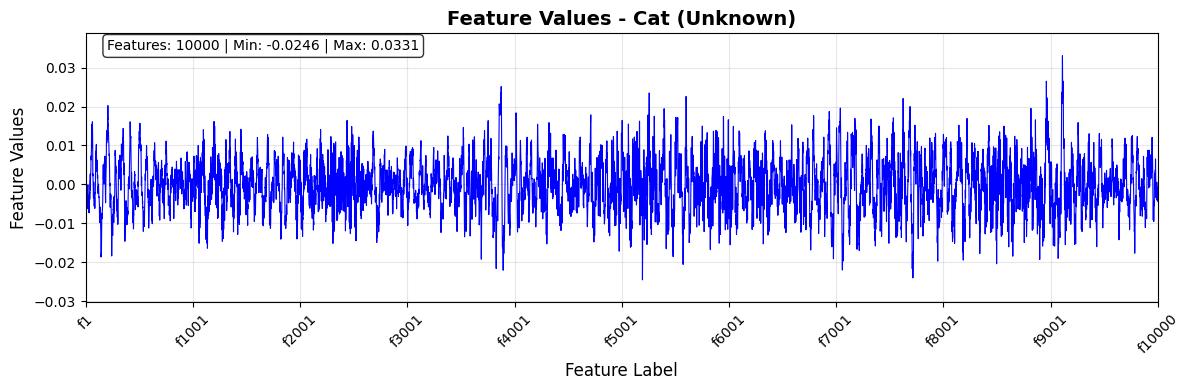

In [25]:
# Plot single waveform
fig1 = plot_audio_waveform(train_features, row_index=150)
plt.show()

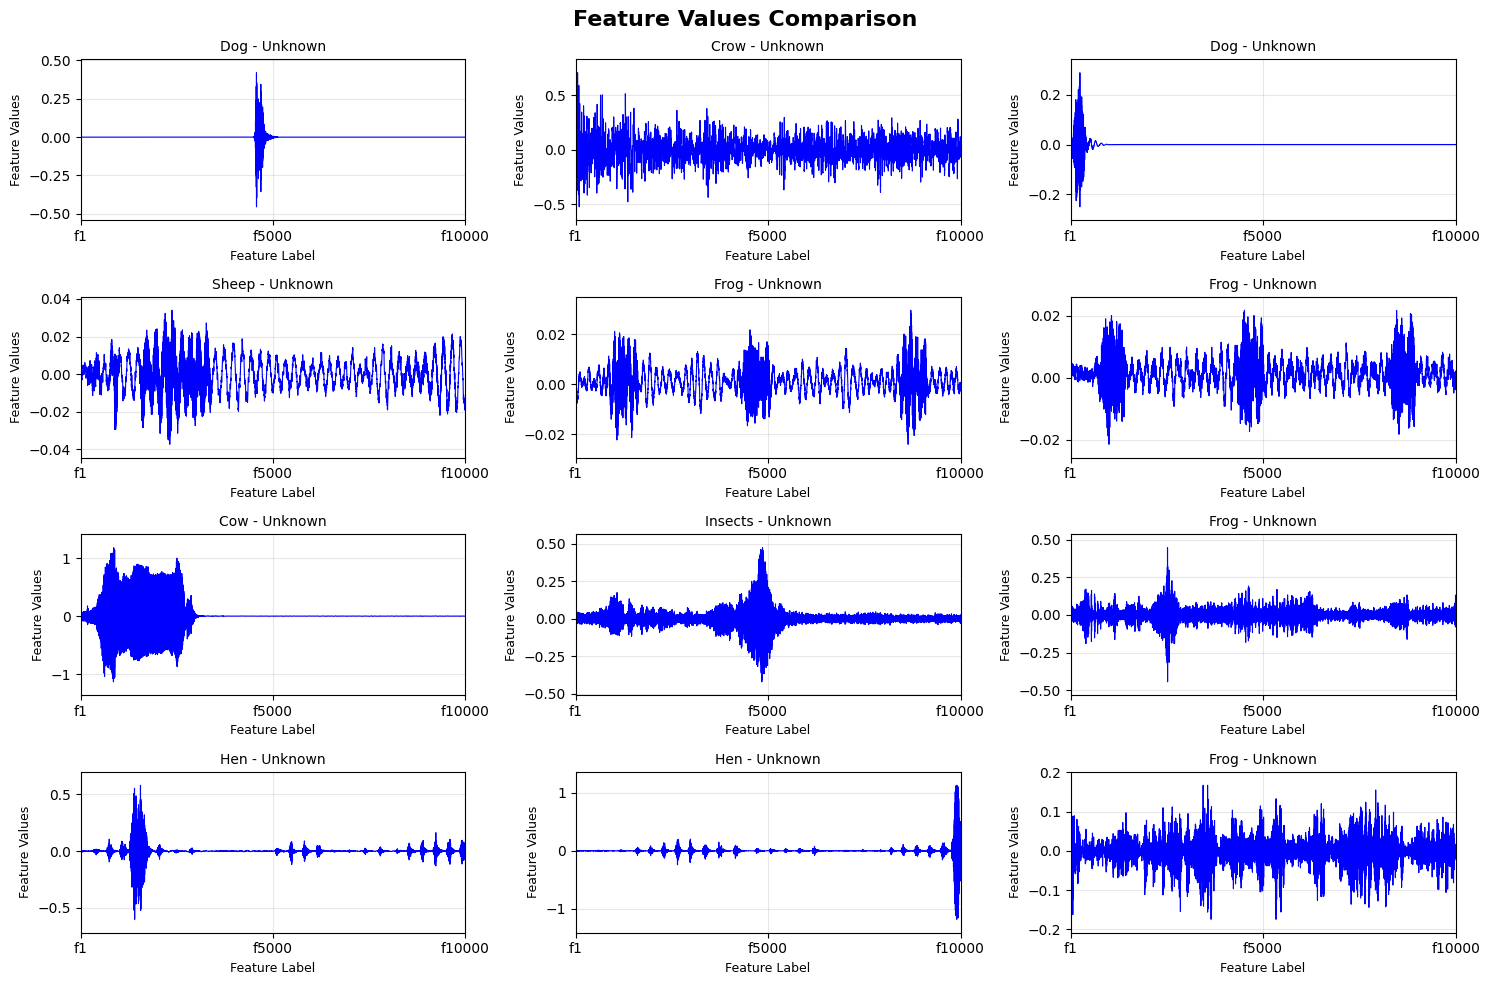

In [26]:
# Plot multiple waveforms for comparison
fig2 = plot_multiple_waveforms(train_features, row_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.show()

## Inspect feature ranges
- to ensure feature values around - 1, 1
- feature mean becomes zero centric
- if fullfiled, we achieve ideal condition for neural networks training

In [29]:
def inspect_feature_range(feature_df, verbose=True):
    """
    Inspect feature values to check if any values are outside the range [-1, 1].
    This helps determine if data scaling is needed.

    Parameters:
    feature_df (pd.DataFrame): Feature dataframe containing f1, f2, ..., fn columns
    verbose (bool): If True, print detailed information about out-of-range values

    Returns:
    dict: Dictionary containing inspection results:
        - 'needs_scaling': Boolean indicating if scaling is needed
        - 'min_value': Minimum value found across all features
        - 'max_value': Maximum value found across all features
        - 'out_of_range_count': Number of values outside [-1, 1]
        - 'total_feature_values': Total number of feature values
        - 'percentage_out_of_range': Percentage of values outside [-1, 1]
        - 'features_with_issues': List of feature columns with out-of-range values
        - 'summary_stats': Summary statistics for all features
    """
    if feature_df.empty:
        print("Feature dataframe is empty")
        return None

    # Extract feature columns (f1, f2, f3, ...)
    feature_columns = [col for col in feature_df.columns if col.startswith('f') and col[1:].isdigit()]
    feature_columns.sort(key=lambda x: int(x[1:]))  # Sort numerically

    if not feature_columns:
        print("No feature columns found (columns starting with 'f')")
        return None

    # Extract all feature values
    feature_data = feature_df[feature_columns]

    # Calculate overall statistics
    min_value = feature_data.min().min()
    max_value = feature_data.max().max()

    # Check for values outside [-1, 1]
    below_neg_one = (feature_data < -1).sum().sum()
    above_pos_one = (feature_data > 1).sum().sum()
    out_of_range_count = below_neg_one + above_pos_one

    total_feature_values = feature_data.size
    percentage_out_of_range = (out_of_range_count / total_feature_values) * 100

    # Find which features have out-of-range values
    features_with_issues = []
    for col in feature_columns:
        col_data = feature_data[col]
        if (col_data < -1).any() or (col_data > 1).any():
            col_min = col_data.min()
            col_max = col_data.max()
            below_count = (col_data < -1).sum()
            above_count = (col_data > 1).sum()
            features_with_issues.append({
                'feature': col,
                'min_value': col_min,
                'max_value': col_max,
                'below_neg_one': below_count,
                'above_pos_one': above_count
            })

    # Summary statistics
    summary_stats = {
        'mean': feature_data.mean().mean(),
        'std': feature_data.std().std(),
        'min': min_value,
        'max': max_value,
        'q25': feature_data.quantile(0.25).mean(),
        'q50': feature_data.quantile(0.50).mean(),
        'q75': feature_data.quantile(0.75).mean()
    }

    # Determine if scaling is needed
    needs_scaling = out_of_range_count > 0

    # Print detailed report if verbose
    if verbose:
        print("=== Feature Range Inspection Report ===\n")
        print(f"Total samples: {len(feature_df)}")
        print(f"Total features per sample: {len(feature_columns)}")
        print(f"Total feature values: {total_feature_values:,}")
        print(f"\nValue Range Analysis:")
        print(f"  Minimum value: {min_value:.6f}")
        print(f"  Maximum value: {max_value:.6f}")
        print(f"  Values below -1: {below_neg_one:,}")
        print(f"  Values above +1: {above_pos_one:,}")
        print(f"  Total out-of-range: {out_of_range_count:,} ({percentage_out_of_range:.2f}%)")

        print(f"\nScaling Recommendation:")
        if needs_scaling:
            print("  DATA SCALING IS NEEDED")
            print("  Values found outside the range [-1, 1]")
            print("  Consider using MinMaxScaler, StandardScaler, or RobustScaler")
        else:
            print("  NO SCALING NEEDED")
            print("  All values are within the range [-1, 1]")

        print(f"\nSummary Statistics:")
        print(f"  Mean: {summary_stats['mean']:.6f}")
        print(f"  Std:  {summary_stats['std']:.6f}")
        print(f"  Q25:  {summary_stats['q25']:.6f}")
        print(f"  Q50:  {summary_stats['q50']:.6f}")
        print(f"  Q75:  {summary_stats['q75']:.6f}")

        if features_with_issues and len(features_with_issues) <= 20:
            print(f"\nFeatures with out-of-range values (showing first 20):")
            for issue in features_with_issues[:20]:
                print(f"  {issue['feature']}: min={issue['min_value']:.6f}, max={issue['max_value']:.6f}")
                if issue['below_neg_one'] > 0:
                    print(f"    - {issue['below_neg_one']} values below -1")
                if issue['above_pos_one'] > 0:
                    print(f"    - {issue['above_pos_one']} values above +1")
        elif features_with_issues:
            print(f"\nNumber of features with issues: {len(features_with_issues)}")
            print("(Too many to display individual details)")

    # Return results dictionary
    return {
        'needs_scaling': needs_scaling,
        'min_value': min_value,
        'max_value': max_value,
        'out_of_range_count': out_of_range_count,
        'total_feature_values': total_feature_values,
        'percentage_out_of_range': percentage_out_of_range,
        'features_with_issues': features_with_issues,
        'summary_stats': summary_stats,
        'below_neg_one': below_neg_one,
        'above_pos_one': above_pos_one
    }

def quick_feature_check(feature_df):
    """
    Quick check to see if scaling is needed (minimal output).

    Parameters:
    feature_df (pd.DataFrame): Feature dataframe

    Returns:
    bool: True if scaling is needed, False otherwise
    """
    result = inspect_feature_range(feature_df, verbose=False)
    if result:
        if result['needs_scaling']:
            print(f"Scaling needed: {result['out_of_range_count']} values outside [-1,1] range")
            print(f"Range: [{result['min_value']:.4f}, {result['max_value']:.4f}]")
        else:
            print("No scaling needed: All values within [-1,1] range")
        return result['needs_scaling']
    return None

In [30]:
inspection_result = inspect_feature_range(train_features)

=== Feature Range Inspection Report ===

Total samples: 280
Total features per sample: 10000
Total feature values: 2,800,000

Value Range Analysis:
  Minimum value: -1.322818
  Maximum value: 1.391396
  Values below -1: 664
  Values above +1: 848
  Total out-of-range: 1,512 (0.05%)

Scaling Recommendation:
  DATA SCALING IS NEEDED
  Values found outside the range [-1, 1]
  Consider using MinMaxScaler, StandardScaler, or RobustScaler

Summary Statistics:
  Mean: -0.000028
  Std:  0.025461
  Q25:  -0.010311
  Q50:  0.000003
  Q75:  0.010246

Number of features with issues: 1397
(Too many to display individual details)


In [48]:
inspection_result = inspect_feature_range(val_features)

=== Feature Range Inspection Report ===

Total samples: 80
Total features per sample: 10000
Total feature values: 800,000

Value Range Analysis:
  Minimum value: -1.129036
  Maximum value: 1.112384
  Values below -1: 60
  Values above +1: 48
  Total out-of-range: 108 (0.01%)

Scaling Recommendation:
  DATA SCALING IS NEEDED
  Values found outside the range [-1, 1]
  Consider using MinMaxScaler, StandardScaler, or RobustScaler

Summary Statistics:
  Mean: -0.000181
  Std:  0.023972
  Q25:  -0.009088
  Q50:  0.000021
  Q75:  0.008868

Number of features with issues: 108
(Too many to display individual details)


In [31]:
inspection_result = inspect_feature_range(test_features)

=== Feature Range Inspection Report ===

Total samples: 40
Total features per sample: 10000
Total feature values: 400,000

Value Range Analysis:
  Minimum value: -0.995423
  Maximum value: 1.028579
  Values below -1: 0
  Values above +1: 7
  Total out-of-range: 7 (0.00%)

Scaling Recommendation:
  DATA SCALING IS NEEDED
  Values found outside the range [-1, 1]
  Consider using MinMaxScaler, StandardScaler, or RobustScaler

Summary Statistics:
  Mean: -0.000182
  Std:  0.025925
  Q25:  -0.012003
  Q50:  -0.000061
  Q75:  0.011495

Features with out-of-range values (showing first 20):
  f3732: min=-0.050287, max=1.025584
    - 1 values above +1
  f3741: min=-0.071384, max=1.000844
    - 1 values above +1
  f3771: min=-0.057667, max=1.028579
    - 1 values above +1
  f4884: min=-0.135228, max=1.008392
    - 1 values above +1
  f4912: min=-0.076305, max=1.000623
    - 1 values above +1
  f4914: min=-0.109310, max=1.003494
    - 1 values above +1
  f8872: min=-0.246228, max=1.006620
    - 1

**Conclusion:**
- no significant feature value outside the range,
- no need data scaling

## Save features

In [32]:
import os

output_path = f'{AUDIO_PATH}/for_training'
if not os.path.exists(output_path):
   os.makedirs(output_path)

# Save file
train_features.to_csv(f'{output_path}/train.csv')
val_features.to_csv(f'{output_path}/val.csv')
test_features.to_csv(f'{output_path}/test.csv')